# Обработаем исходые данные

### Получим данные

In [27]:
import pandas as pd
train = pd.read_csv("train.csv")
train

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Как видим, пропущенных значений нет

### Получим описательную статистику

In [29]:
train.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


### Проверяем каждый принзак на наличие аномалий

In [30]:
train.value_counts("ClientPeriod")


ClientPeriod
1     457
72    284
2     165
3     162
4     136
     ... 
57     39
39     35
36     34
44     34
0       9
Name: count, Length: 73, dtype: int64

In [31]:
train.value_counts("MonthlySpending")

MonthlySpending
20.05     46
19.65     35
19.95     34
20.00     33
19.80     32
          ..
71.45      1
71.50      1
71.55      1
71.60      1
118.75     1
Name: count, Length: 1468, dtype: int64

array([[<Axes: title={'center': 'MonthlySpending'}>]], dtype=object)

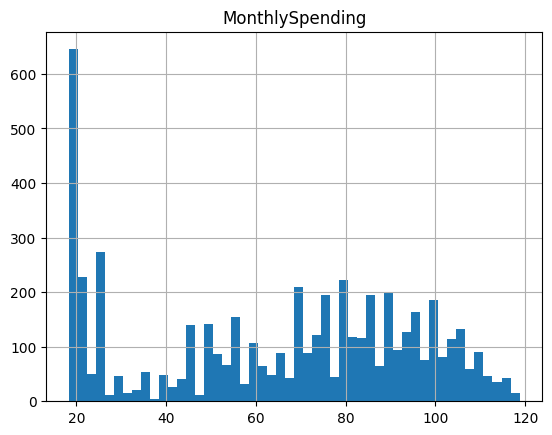

In [32]:
train.hist("MonthlySpending", bins=50)

In [33]:
mean_spending = train["MonthlySpending"].mean()
mean_spending

64.92475388110564

In [34]:
median_spending = train["MonthlySpending"].quantile()
median_spending

70.4

Численные признаки не имеют аномальных значений

Можем убрать признак TotalSpent, так как он линейно зависит от MonthlySpending и ClientPeriod

In [35]:
train.drop("TotalSpent", axis=1, inplace=True)
train

,ClientPeriod,MonthlySpending,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


### Посмотрим распределение числовых переменных

array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'IsSeniorCitizen'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

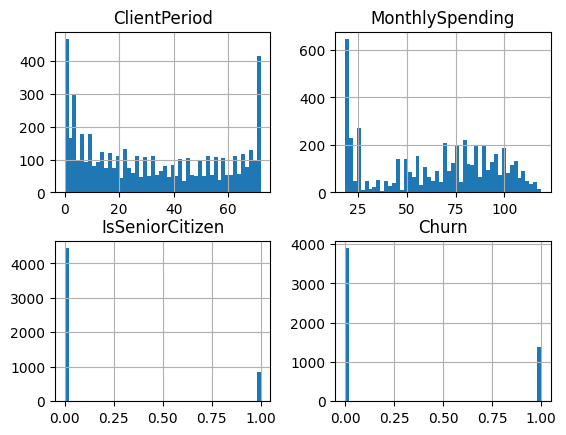

In [36]:
train.hist(bins=50) 

# Обработка категориальных признаков

### Покажем распределение для категориальных признаков(частотный анализ)

In [37]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [38]:
train_columns = train.columns
for i, column in enumerate(train_columns):
    if i<2 or i>17: # чтобы убрать числовые признаки
        continue
    print(train[column].value_counts())
    print()

Sex
Male      2655
Female    2627
Name: count, dtype: int64

IsSeniorCitizen
0    4440
1     842
Name: count, dtype: int64

HasPartner
No     2705
Yes    2577
Name: count, dtype: int64

HasChild
No     3676
Yes    1606
Name: count, dtype: int64

HasPhoneService
Yes    4761
No      521
Name: count, dtype: int64

HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: count, dtype: int64

HasInternetService
Fiber optic    2341
DSL            1800
No             1141
Name: count, dtype: int64

HasOnlineSecurityService
No                     2612
Yes                    1529
No internet service    1141
Name: count, dtype: int64

HasOnlineBackup
No                     2332
Yes                    1809
No internet service    1141
Name: count, dtype: int64

HasDeviceProtection
No                     2317
Yes                    1824
No internet service    1141
Name: count, dtype: int64

HasTechSupportAccess
No                     2604
Yes         

### Покажем распределение категориальных признаков(круговые диаграммы)

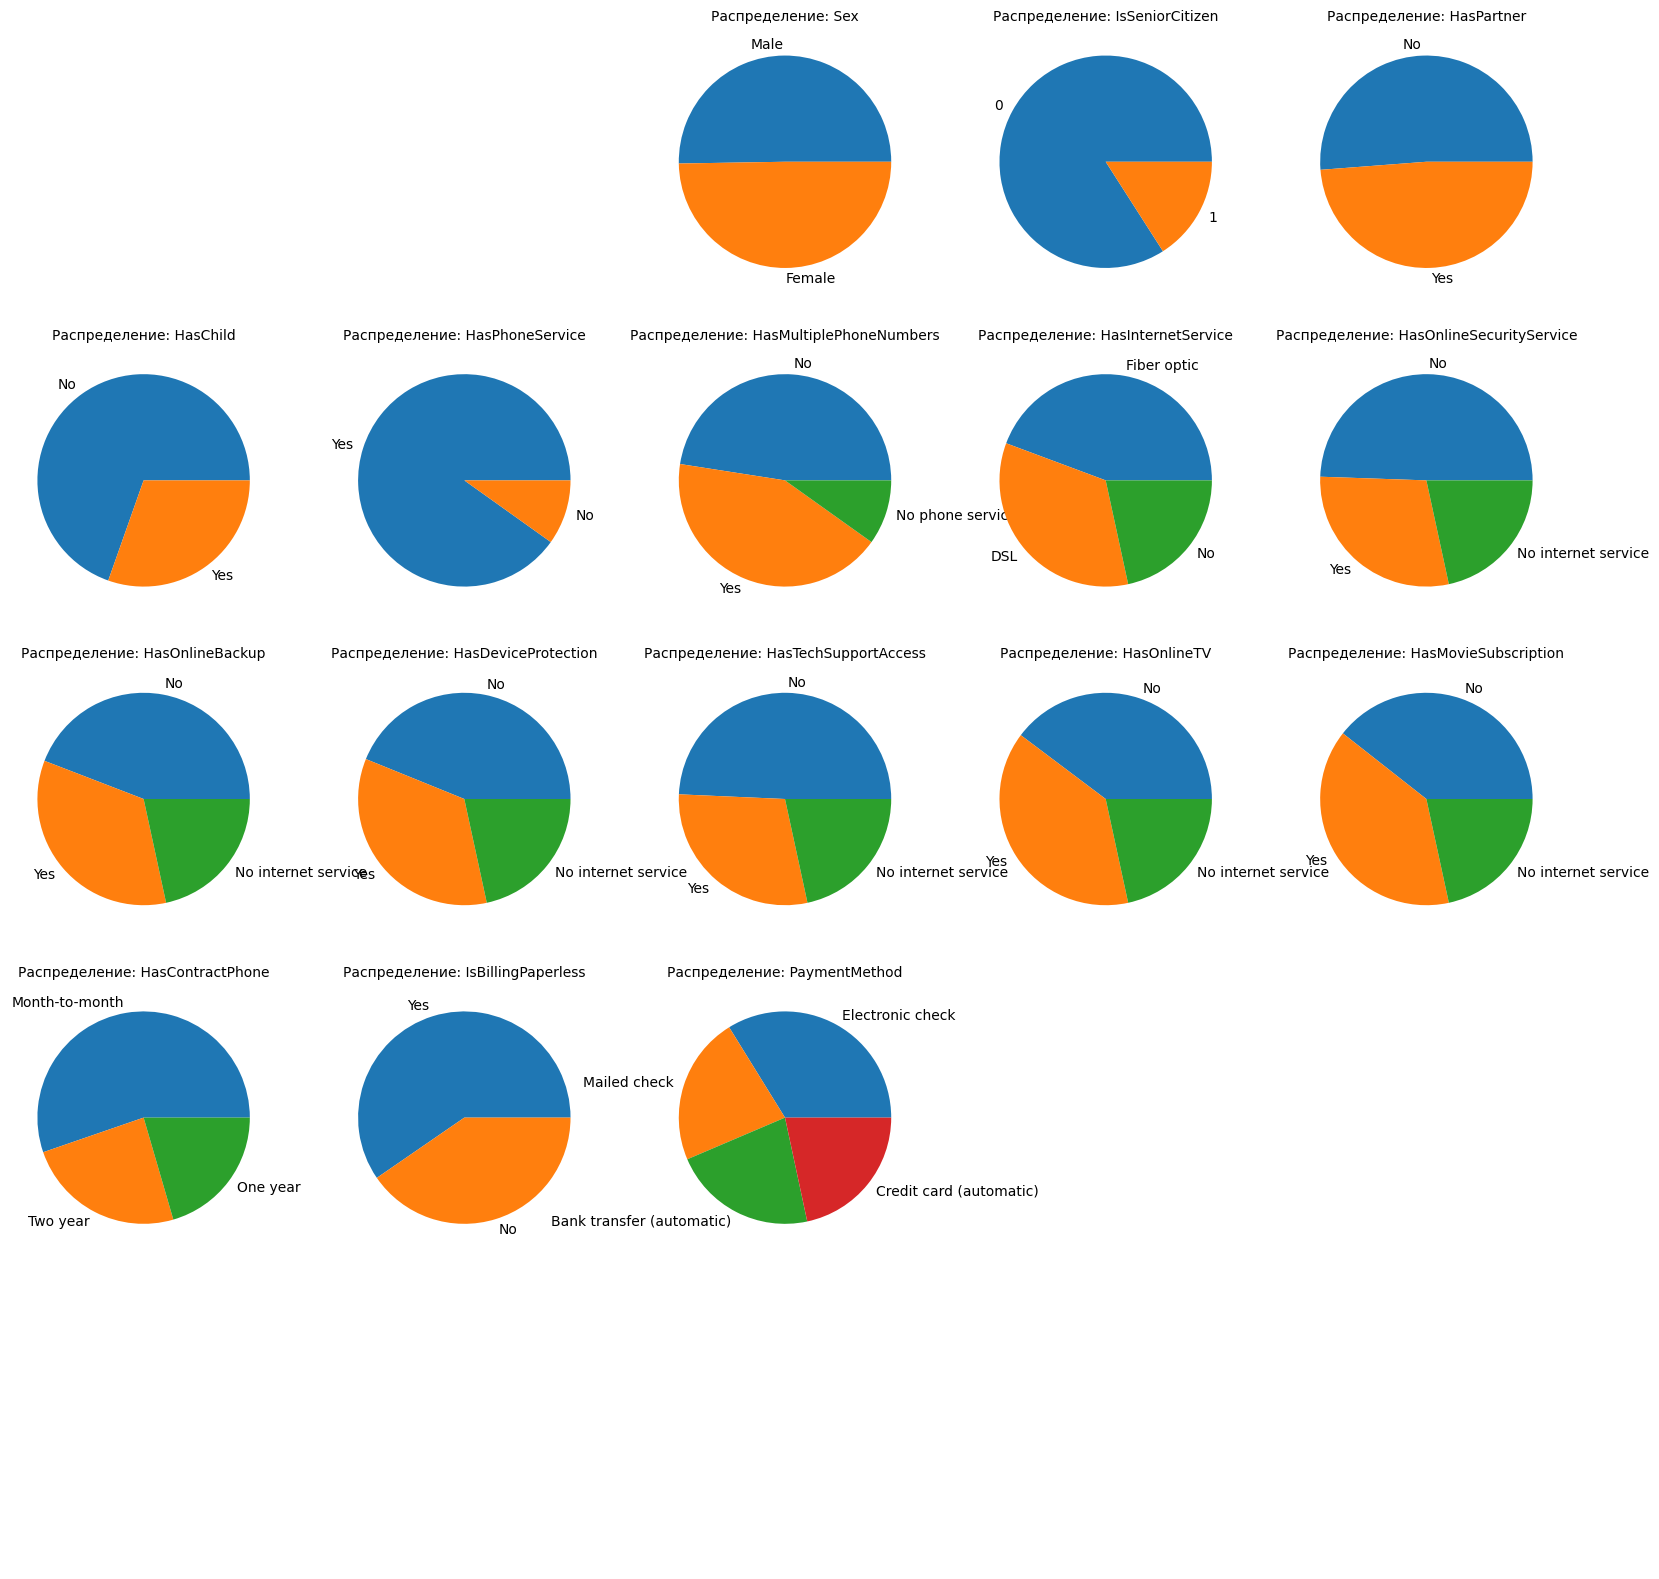

In [39]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20,20))
axes = axes.flatten()

for i, column in enumerate(train_columns):
    if i<2 or i>17: # числовые признаки чтоб убрать
        continue
    train[column].value_counts().plot.pie(ax=axes[i])
    axes[i].set_title(f'Распределение: {column}', fontsize=10)
    axes[i].set_ylabel('')

for j in range(i, len(axes)):
    axes[j].axis('off')

for k in range(0, 2):
    axes[k].axis("off")

plt.show()

### Теперь, закодируем категориальные признаки(используем метод LabelEncoder)

In [100]:
from sklearn.preprocessing import LabelEncoder

train_encoded = train.copy()

categorial_cols = train.select_dtypes(include=["object", 'category']).columns.tolist()

label_encoders = {} # чтобы для коммита и тестовой выборки использовать те же энкодеры

for col in categorial_cols:
    le = LabelEncoder()
    train_encoded[col] = le.fit_transform(train[col])
    label_encoders[col] = le

train_encoded.describe()



,ClientPeriod,MonthlySpending,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.502651,0.159409,0.487883,0.304051,0.901363,0.950587,0.875237,0.794964,0.900984,0.906664,0.797993,0.989209,0.996024,0.689512,0.595986,1.570807,0.262022
std,24.550326,30.176464,0.500040,0.366092,0.499900,0.460048,0.298202,0.948204,0.735754,0.861443,0.879958,0.880579,0.862159,0.885446,0.885503,0.835992,0.490747,1.065904,0.439776
min,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,29.000000,70.400000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000
75%,55.000000,90.050000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000


разделим обучающую выборку на обучающую и контрольную

In [43]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(train_encoded[train_encoded.columns[:18]], train_encoded["Churn"], test_size=0.2, shuffle=False)

In [44]:
train_x


,ClientPeriod,MonthlySpending,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1,0,1,1,1,0,2,1,1,1,1,1,1,1,0,3
1,72,25.85,1,0,1,0,1,2,2,1,1,1,1,1,1,2,0,1
2,1,75.90,1,0,0,0,1,0,1,0,0,0,2,0,0,0,1,2
3,32,79.30,0,1,1,0,1,2,1,0,0,2,0,0,0,0,0,3
4,60,115.25,0,0,1,1,1,2,1,2,2,2,2,2,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,70,80.70,0,0,1,1,1,2,0,2,2,2,2,2,0,2,0,2
4221,5,90.35,1,0,1,1,1,0,1,2,0,2,0,0,2,0,1,3
4222,17,54.60,1,0,1,0,0,1,0,0,0,2,2,2,2,1,0,2
4223,19,39.65,1,0,0,0,0,1,0,0,0,2,0,2,0,0,1,2


обучаем модель KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 20
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_model.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=20)

Получим предсказания модели на тестовой выборке

In [83]:
l= knn_model.predict(test_x)
l


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

Проверим качество модели на основе метрики ROС-AUC

In [84]:
from sklearn.metrics import roc_auc_score
roc_auc_score(knn_model.predict(test_x), test_y)

0.7302555168408826

Наша модель KNN предсказывает результат с точностью 0.73

Обучим модель логистической регрессии(максимальное количество итераций 300, так как за меньшее количество модель не достигает сходимости)

In [85]:
from sklearn.linear_model import LogisticRegression

logr_model = LogisticRegression(max_iter=300)
logr_model.fit(train_x, train_y)

LogisticRegression(max_iter=300)

Получим предсказания модели на тестовой выборке и проверим качество модели на основе ROC_AUC

In [86]:
roc_auc_score(logr_model.predict(test_x), test_y)

0.7404579570417379

Наша модель Logr предсказывает результат с точностью 0.74

Обучим модель SVM(SVC - так как задача классификации)

In [50]:
from sklearn.svm import LinearSVC

svc_model = LinearSVC(penalty='l2', C=0.3) # с регуляризацией результат лучше на 0.001
svc_model.fit(train_x, train_y)

LinearSVC(C=0.3)

Получим предсказания модели на тестовой выборке и проверим качество модели на основе ROC_AUC

In [51]:
roc_auc_score(svc_model.predict(test_x), test_y)

0.743720557022312

Наша модель SVC предсказывает результат с точостью 0.74(чуть лучше, чем логистическая регрессия)

# Построим матрицу ошибок для каждой модели

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

### для knn

Text(50.722222222222214, 0.5, 'true values')

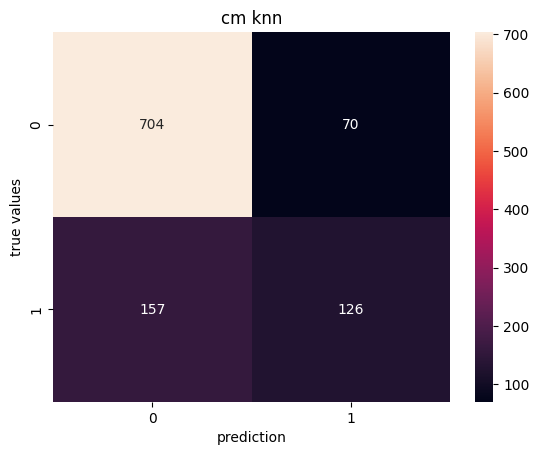

In [98]:
cm_knn = confusion_matrix(test_y ,knn_model.predict(test_x))
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.title("cm knn")
plt.xlabel('prediction')
plt.ylabel('true values')

### для logr

Text(50.722222222222214, 0.5, 'true values')

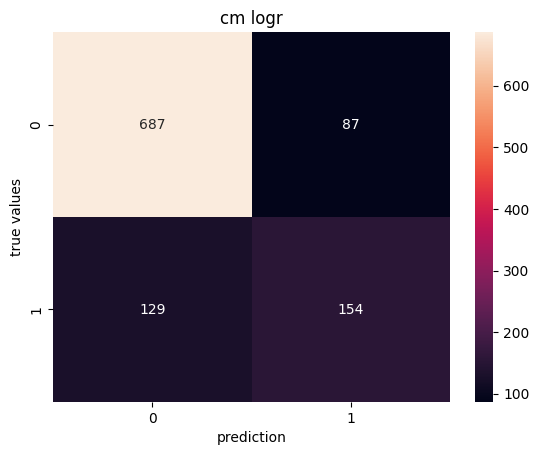

In [99]:
cm_logr = confusion_matrix(test_y ,logr_model.predict(test_x))
sns.heatmap(cm_logr, annot=True, fmt='d')
plt.title("cm logr")
plt.xlabel('prediction')
plt.ylabel('true values')

### для svc

Text(50.722222222222214, 0.5, 'true values')

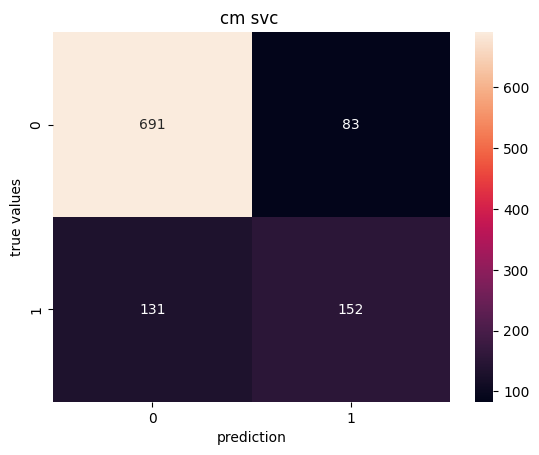

In [96]:
cm_svc = confusion_matrix(test_y ,svc_model.predict(test_x))
sns.heatmap(cm_svc, annot=True, fmt='d')
plt.title("cm svc ")
plt.xlabel('prediction')
plt.ylabel('true values')

# Подготовим файлы на отправку

### Обработаем commit-выборку

In [52]:
check_commit = pd.read_csv("test.csv") #для контрольных предсказаний
check_commit.drop("TotalSpent", axis=1, inplace=True)

check_commit_encoded = check_commit.copy()

for col in categorial_cols:
    le = label_encoders[col]
    check_commit_encoded[col] = le.transform(check_commit[col])

### Предскажем значения knn для commit-выборки

In [53]:
knn_commit_predict = knn_model.predict(check_commit_encoded)

submission = pd.DataFrame({'Id': check_commit.index,
                           'Churn': knn_commit_predict})

submission.to_csv('submission_knn.csv', index=False)



### Предскажем значения logr для commit-выборки

In [54]:
logr_commit_predict = logr_model.predict(check_commit_encoded)

submission = pd.DataFrame({"Id": check_commit.index,
                          'Churn':logr_commit_predict})
submission.to_csv('submission_logr.csv', index=False)

### Предскажем значения SVC для commit-выборки

In [55]:
svc_commit_predict = svc_model.predict(check_commit_encoded)

submission = pd.DataFrame({"Id": check_commit.index,
                          'Churn':svc_commit_predict})
submission.to_csv('submission_svc.csv', index=False)